# Car Parking checker


Enric Ferrera González  
Miguel López Manzanares  
Joan Marc  

El objectiu del proyecte de visió per computador es crear un programa que comprovi les plaçes d'aparcament d'un parking. Si están buides o plenes y en cas de que estiguin plenes, detectar la matrícula del coche, el color y si es pot la marca.  

Es realitzará de dues maneres, primer amb métodes clásics de la visió per computador y després amb métodes moderns com, per exemple, les xarxes neuronals. 

# Part clàsica

### 1. Dectectar línies
Per començar la part clàsica volem detectar les línies de les plaçes d'aparcament.

Per detectar les línies d'aparcament en una imatge d'un aparcament utilitzant mètodes clàssics de visió per computador, es poden seguir els següents passos:

1. **Conversió a escala de grisos:** Facilita el processament de la imatge.
2. **Filtrat de soroll:** S'utilitza un filtre com el Gaussian Blur per reduir el soroll.
3. **Detecció de vores:** S'aplica l'algoritme de Canny per detectar les vores de la imatge.
4. **Transformada de Hough:** Permet detectar línies rectes a la imatge, que corresponen a les línies d'aparcament.
5. **Dibuix de les línies detectades:** Es mostren les línies sobre la imatge original per visualitzar el resultat.

Aquests passos es poden implementar amb la llibreria OpenCV.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title="", cmap='gray'):
    plt.figure(figsize=(12, 4))
    if len(img.shape) == 2:  # grayscale
        plt.imshow(img, cmap=cmap)
    else:  # BGR to RGB for color images
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Cargar imagen
image = cv2.imread("imatges\parking1.png")
original = image.copy()

# Recortar si es necesario (ajustar offset si ya recortabas antes)
offset_y = 0
roi = image[offset_y:]

In [ ]:
# --- Paso 1: Convertir a HSV y filtrar blancos ---
hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 40, 255])
mask_white = cv2.inRange(hsv, lower_white, upper_white)
show_image(mask_white, "Máscara blanco (HSV)")

In [ ]:
# --- Paso 2: Aplicar máscara a imagen en escala de grises ---
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
gray_masked = cv2.bitwise_and(gray, gray, mask=mask_white)
show_image(gray_masked, "Gris con máscara blanca")

In [ ]:
# --- Paso 3: Suavizado y Canny ---
blur = cv2.GaussianBlur(gray_masked, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)
show_image(edges, "Canny filtrado por blanco")

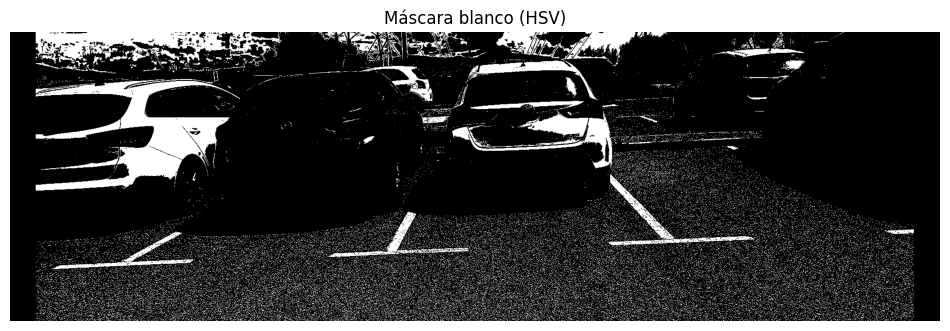

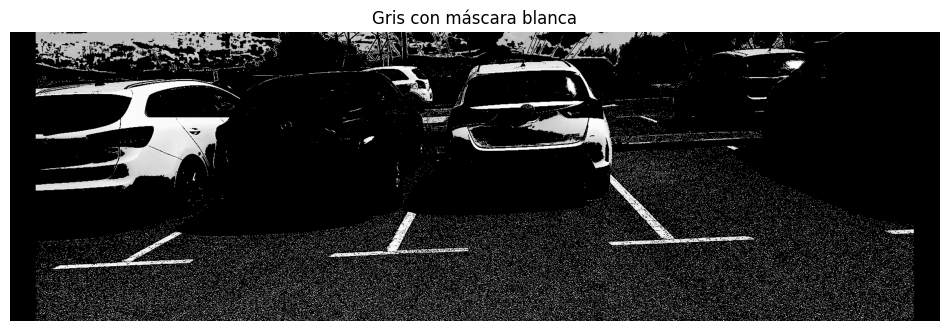

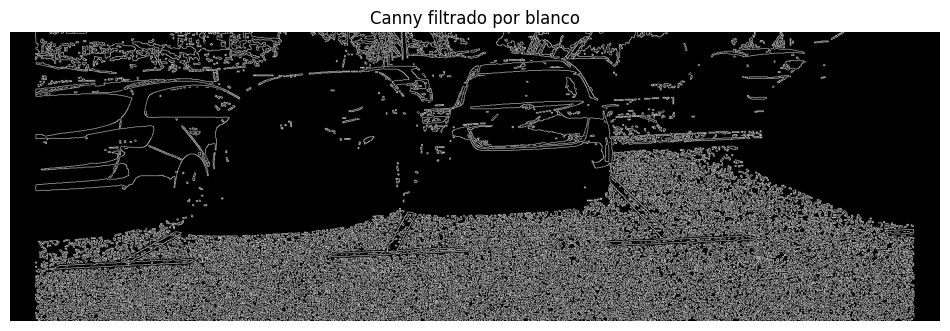

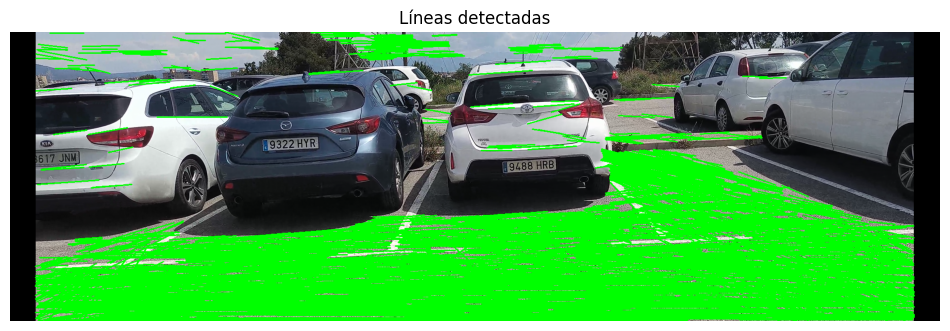

In [ ]:
# --- Paso 4: Detección de líneas con Hough ---
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
line_img = roi.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

show_image(line_img, "Líneas detectadas")
